<a href="https://colab.research.google.com/github/SorrowAddict/SK-FLY-AI/blob/main/AI_Learning/Week-02_Machine_Learning/231228_CNN_4_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 CNN CIFAR 10

- 50,000개의 학습데이터, 10,000개의 테스트 데이터로 구성

- 데이터 복잡도가 MNIST보다 훨씬 높은 특징이 있음
  - 신경망이 특징을 검출하기 어려움

  <img src="https://www.researchgate.net/profile/Jean_Elsner/publication/329969195/figure/fig1/AS:708799606317059@1546002403551/Images-from-the-CIFAR-10-13-dataset-and-their-corresponding-classes-CIFAR-10.ppm">


### modules import

In [ ]:
import numpy as np
# 숫자 -> One-hot Vector 를 위한 라이브러리
from keras.utils import to_categorical
# CIFAR-10 Dataset을 가져오기 위한 라이브러리
from keras.datasets import cifar10
# 순차적인 모델을 만들기 위한 Sequential 함수
from keras.models import Sequential
# 필요한 층들을 가지고 있는 layers 라이브러리
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
# Google Colab에서 이미지를 보기 위한 cv2_imshow 함수
from google.colab.patches import cv2_imshow

### 데이터 로드 및 전처리

x_train : (50000, 32, 32, 3)
y_train : (50000, 1)
x_test : (10000, 32, 32, 3)
y_test : (10000, 1)


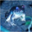

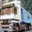

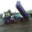

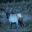

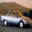

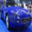

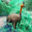

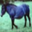

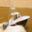

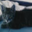

In [ ]:
# CIFAR-10 Dataset 가져오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train :', np.shape(x_train))
print('y_train :', np.shape(y_train))
print('x_test :', np.shape(x_test))
print('y_test :', np.shape(y_test))
# 한 번 Training Dataset의 이미지 10개 정도 봅시다
for i in range(10):
  cv2_imshow(x_train[i])

In [ ]:
# Loss의 스케일 조정을 위해 0 ~ 255 -> 0 ~ 1 범위로 만들어줍니다
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# 이번엔 Test Dataset을 Validation Set으로 써봅니다
# One-Hot Encoding (숫자 -> One-Hot Vector)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('y_train :', np.shape(y_train))

y_train : (50000, 10)


### 모델 구성 및 컴파일


In [ ]:
# 모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN')
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
                 input_shape=(width, height, channel)))
model.add(Dropout(0.25))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
# pool_size : MaxPooling 의 Window size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())
# 출력층 MLP
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "CIFAR10_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 64)        0         
                                                       

### 모델 학습 및 평가
- [런타임]에서 GPU 설정


In [ ]:
# 모델 학습과정 설정하기
# loss : 목적 함수
# categorical_crossentropy : 분류가 2개 이상인 CEE
# optimizer : 학습 방법, SGD를 사용합니다.
# metrics : 학습 도중 화면에 어떤 값을 띄울까를 결정합니다.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train,
                 epochs=10,
                 batch_size=64,
                 validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 149s 189ms/step - loss: 1.6983 - accuracy: 0.3939 - val_loss: 1.8580 - val_accuracy: 0.3486
Epoch 2/10
782/782 [==============================] - 154s 196ms/step - loss: 1.5835 - accuracy: 0.4323 - val_loss: 1.7502 - val_accuracy: 0.4193
Epoch 3/10
782/782 [==============================] - 148s 189ms/step - loss: 1.5085 - accuracy: 0.4586 - val_loss: 1.6418 - val_accuracy: 0.4731
Epoch 4/10
782/782 [==============================] - 149s 191ms/step - loss: 1.4445 - accuracy: 0.4837 - val_loss: 1.6468 - val_accuracy: 0.4516
Epoch 5/10
782/782 [==============================] - 151s 194ms/step - loss: 1.3939 - accuracy: 0.5026 - val_loss: 1.5200 - val_accuracy: 0.5302
Epoch 6/10
782/782 [==============================] - 151s 193ms/step - loss: 1.3443 - accuracy: 0.5199 - val_loss: 1.5429 - val_accuracy: 0.4844
Epoch 7/10
782/782 [==============================] - 150s 192ms/step - loss: 1.3092 - accuracy: 0.5336 - val_loss: 1.5222 -

### 학습 과정 시각화

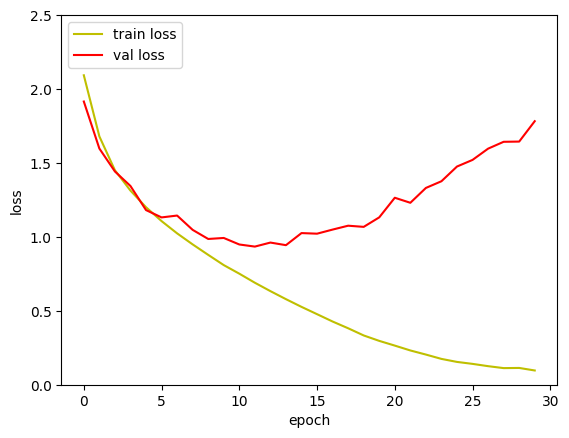

In [ ]:
# 그래프를 그리기 위한 matplotlib 라이브러리
import matplotlib.pyplot as plt
# Training Loss VS Validation Loss 비교를 위한 그래프 그리기
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')
# y축 범위 설정
plt.ylim([0.0, 2.5])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('loss')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
plt.show()

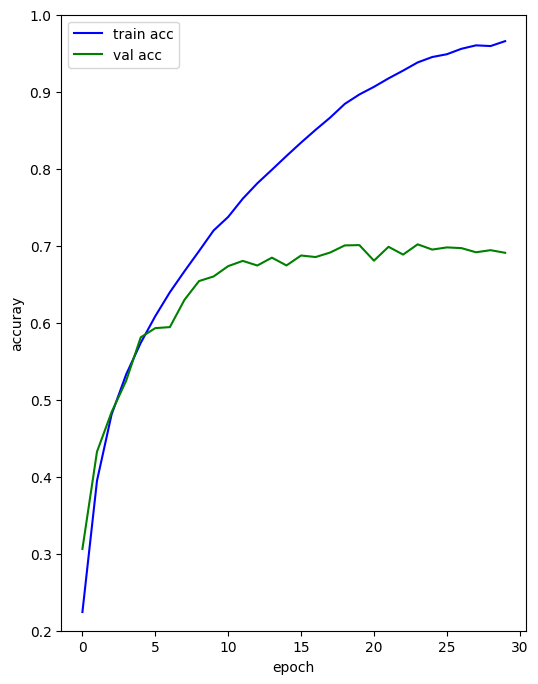

In [ ]:
# Training Accuracy VS Validation Accuracy 비교를 위한 그래프 그리기
plt.figure(figsize=(6,8))
plt.plot(hist.history['accuracy'], 'b', label='train acc')
plt.plot(hist.history['val_accuracy'], 'g', label='val acc')
# y축 범위 설정
plt.ylim([0.2, 1.0])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('accuray')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
# 그래프 그리기
plt.show()

### 모델 학습 및 평가
- [런타임]에서 GPU 설정


In [ ]:
#모델 평가
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test set Loss and Accuracy')
print(loss_and_acc)

313/313 [==============================] - 1s 5ms/step - loss: 1.7826 - accuracy: 0.6908
Test set Loss and Accuracy
[1.7825664281845093, 0.6908000111579895]


### 모델 사용하기

1/1 [==============================] - 1s 600ms/step
예측: 고양이 / 정답: 고양이


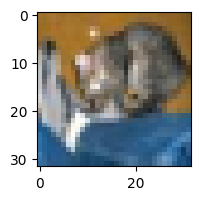

1/1 [==============================] - 0s 26ms/step
예측: 배 / 정답: 배


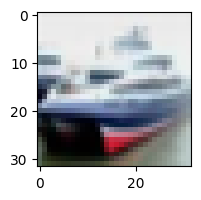

1/1 [==============================] - 0s 26ms/step
예측: 배 / 정답: 배


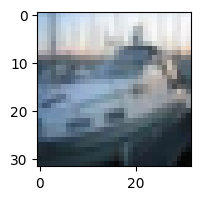

1/1 [==============================] - 0s 29ms/step
예측: 비행기 / 정답: 비행기


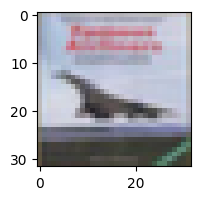

1/1 [==============================] - 0s 17ms/step
예측: 개구리 / 정답: 개구리


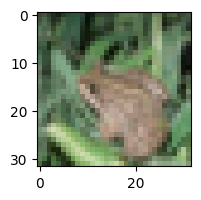

1/1 [==============================] - 0s 18ms/step
예측: 개구리 / 정답: 개구리


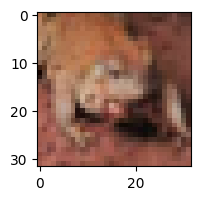

1/1 [==============================] - 0s 18ms/step
예측: 트럭 / 정답: 자동차


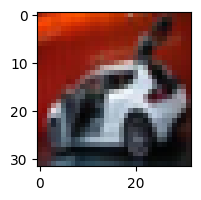

1/1 [==============================] - 0s 18ms/step
예측: 새 / 정답: 개구리


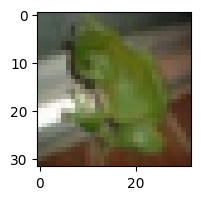

1/1 [==============================] - 0s 18ms/step
예측: 고양이 / 정답: 고양이


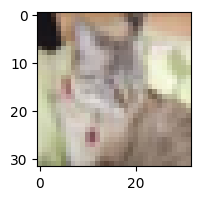

1/1 [==============================] - 0s 16ms/step
예측: 자동차 / 정답: 자동차


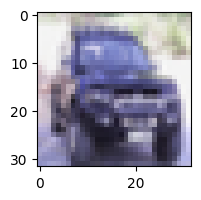

In [ ]:
#모델 사용하기
# 이미지의 종류가 무엇인지에 대한 리스트
labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']
# 출력 그림의 크기를 결정합니다.
plt.rcParams["figure.figsize"] = (2,2)
# Test Set의 10개를 맞추어 봅시다.
for i in range(10):
  # 모델 사용
  output = model.predict(x_test[i].reshape(1,width, height, channel))

  # 이미지 출력
  plt.imshow(x_test[i].reshape(width, height, channel))
  # np.argmax()가 labels의 인덱스가 되어 labels 배열에 있는 문자열을 출력합니다.
  print('예측: ' + labels[np.argmax(output)] + ' / 정답: ' + labels[np.argmax(y_test[i])])
  plt.show()